# Решающие деревья (деревья решений, *decision trees*)

## Идея

Дерево решений $-$ это алгоритм, который предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил (*предикатов*). По сути, это напоминает то, как человек принимает решения.

В общем случае решающее дерево $-$ это $k$-ичное дерево с решающими правилами в нелистовых вершинах (узлах) и некотором заключении о целевой функции в листовых вершинах (прогнозом). Чаще всего на практике используются **двоичные решающие деревья**, где в листовых вершинах могут находиться разные объекты:
- класс, который нужно присвоить попавшему туда объекту (в задаче классификации),
- вероятности классов (в задаче классификации),
- непосредственно значение целевой функции (задача регрессии).

| **Пример решающего дерева для классификации** | **Визуализация решающей поверхности для регрессии** |
|:-:|:-:|
| ![](https://yastatic.net/s3/education-portal/media/3_2_41c1793bef_fda82166a3.webp) | ![](https://yastatic.net/s3/education-portal/media/3_3_64f47eb4c8_29f1b64e0b.webp) |

*Источник: Яндекс.Хендбук*

## Теперь чуть более формально:

1. Каждой внутренней вершине $v$ приписан предикат $B_v$: $𝕏→\{0, 1\}$.
2. Каждой листовой вершине $v$ приписан прогноз
$c_v∈𝕐$, где $𝕐$ $-$ область значений целевой переменной (в случае классификации листу может быть также приписан вектор вероятностей классов).
3. Вообще, предикат $B_v$ может иметь, произвольную структуру, но на практике чаще используют просто сравнение с порогом $t$ по какому-то $j$-му признаку: $$B_v(x, t, j)=[x_j≤t]$$

**Важные свойства решающих деревьев**:
- Функция будет кусочно-постоянная, поэтому о градиенте при поиске оптимального решения можно забыть (производная равна нулю везде, где задана).
- Нельзя экстраполировать зависимости за границы области значений обучающей выборки (дерево не может предсказать значения ВНЕ диапазона обучения: новый объект за границами попадает в крайний лист).
- Деревья склонны к переобучению (формулируют "слишком строгие правила"). Можно идеально приблизить обучающую выборку и ничего не выучить: построить такое дерево, в каждый лист которого будет попадать только один объект. Однако при обучении надо не просто приближать обучающую выборку как можно лучше, но и стремиться оставлять дерево как можно более простым, чтобы результат обладал хорошей обобщающей способностью. Часто вместо одного дерева используют ансамбли -- комбинацию нескольких моделей. Для деревьев популярны ансамбли Random Forest (много независимых деревьев) и Gradient Boosting (последовательности деревьев, исправляющие ошибки предыдущих)."

## А как нам эти предикаты найти?

> Алгоритм находит признаки, которые позволяют разделить выборку так, чтобы новые части (сплиты) были более однородны. Затем эти части снова делятся на более однородные части и т.д.


Для того, чтобы найти предикаты, используются два основных критерия:
- энтропия (информационный прирост, *information gain*),
- критерий Джини (*Gini index*).
<br>
<br>
<br>

### 1. Энтропия

**Энтропию** можно рассматривать как "рандомность" сплита на категориальных данных. Чем выше информационный прирост, тем ниже энтропия и наоборот. В формульном виде: $$\text{Entropy}=- \sum^c_{i=1}p_i*\log_2(p_i),$$ где $c$ $-$ это число классов, а $p_i$ $-$ это вероятность $i$-ого класса.


Почему минус? Потому что log от числа меньше 1 отрицательный, а нам нужно положительную энтропию.

**Рассмотрим пример.**
1.  Возьмём мешки с шариками красного и синего цветов.
<br>Мешок 1: 🔴🔴🔴🔴🔴🔴🔵🔵 (6 красных, 2 синих)
<br>Мешок 2: 🔴🔴🔵🔵🔴🔵🔵🔴 (4 красных, 4 синих)
<br>Какой мешок более "предсказуем"? Очевидно, что если вытащить случайный шар из первого мешка, он будет красным с выроятностью 0,75. Вытащить красный шар из второго мешка моджно с вероятностью 0,5. Значит, первый мешок более однороден по признаку "цвет".
Энтропия измеряет, насколько сложно угадать класс случайного объекта.

2. Пусть в мешке все шары красные: 🔴🔴🔴🔴🔴🔴🔴🔴
- вероятность_вытащить_красный = 1
- вероятность_вытащить_синий = 0
- Entropy = -[1 × log₂(1) + 0 × log₂(0)] = -[1 × 0 + 0] = 0

3. Пусть в мешке равное кол-во красных и синих шаров: 🔴🔴🔴🔴🔵🔵🔵🔵
- вероятность_вытащить_красный = 0,5
- вероятность_вытащить_синий = 0,5
- Entropy = -[0.5 × log₂(0.5) + 0.5 × log₂(0.5)] = -[-0.5 - 0.5] = 1

4. Посчитаем энтропию для такого мешка: 🔴🔴🔴🔴🔴🔴🔵🔵
- вероятность_вытащить_красный = 0,8
- вероятность_вытащить_синий = 0,2
- Entropy = -[0.75 × log₂(0.75) + 0.25 × log₂(0.25)] = -[0.75 × (-0.415) + 0.25 × (-2)] = -[-0.311 - 0.5] = 0.811
<br>
<br>
<br>
<br>
<br>
<br>

> Мы хотим сделать такой сплит вершины, чтобы энтропия полученных групп была минимальной, а информационный прирост максимальным.

$$\text{Information Gain} = \text{Entropy}_{\text{родителя}} - \sum_{\text{все дочерние узлы}} \left( \frac{\text{кол-во объектов в узле}}{\text{общее кол-во объектов}} \times \text{Entropy}_{\text{узла}} \right)$$

Пример: разделим мешок 🔴🔴🔴🔴🔴🔴🔵🔵 на два.

Разделение 1:
- Мешок A: 5🔴, 0🔵 → энтропия = 0
- Мешок B: 1🔴, 2🔵 → энтропия = 0.918
- Weighted Entropy = (5/8)×0 + (3/8)×0.918 = 0.344
- Information Gain = 0.811 - 0.344 = 0.467

Разделение 2:
- Мешок A: 4🔴, 1🔵 → энтропия = 0.722
- Мешок B: 2🔴, 1🔵 → энтропия = 0.918
- Weighted Entropy = (5/8)×0.722 + (3/8)×0.918 = 0.798
- Information Gain = 0.811 - 0.798 = 0.013

Разделение 1 лучше, т.к. даёт больший информационный прирост.
<br>
<br>

### 2. Критерий Джини

**Критерий Джини** берет за основу идею, что при стремлении к идеальной однородности сплита вероятность, что два рандомно взятых объекта одинаковы, стремится к $1$. Этот критерий чаще используется при количественных данных и формулируется так: $$\text{Gini}=1-\sum^c_{i=1}(p_i)^2,$$ где $c$ $-$ это число классов, а $p_i$ $-$ это вероятность $i$-ого класса.



> Если группа идеально однородна (все объекты одного класса), то:
- p₁ = 1, p₂ = 0, p₃ = 0, ...
- Gini = 1 - (1² + 0² + 0² + ...) = 0

> Если группа максимально неоднородна (классы в равных долях):
- Для двух классов: p₁ = 0.5, p₂ = 0.5
- Gini = 1 - (0.5² + 0.5²) = 0.5

![](https://images.ctfassets.net/x78yjrjc11pq/6DuY6QCQI9FZoy4vRISinm/b6b86b5b25e20f0ce1690d22878bd89d/14-2.png)

> На каждом узле дерева алгоритм проверяет все доступные признаки и выбирает тот, который даёт максимальное уменьшение неоднородности (максимальный информационный прирост).
<br>
- Для категориальных признаков: рассматриваем все возможные разбиения по категориям.
- Для числовых признаков: cортируем значения признака, рассматриваем все возможные пороги между соседними значениями, для каждого порога проверяем разделение "≤ порога" и "> порога".

## Переобучение

### Гиперпараметры

У решающих деревьев относительно много гиперпараметров:
- критерий (Джини или энтропия)
- максимальная глубина дерева
- минимальный размер сплита / листовой вершины
- максимальное количество рассматриваемых атрибутов
- изменение качества при делении (минимальное уменьшение неоднородности: если разделение уменьшает неоднородность на меньшее значение, чем это, разделение не производится)
- и др.

### Стрижка (*pruning*)

Есть два кардинально разных подхода к стрижке:
- Можно проверять изменение качества прямо во время построения дерева и останавливать тренировку в нужный момент (pre-pruning или early stopping). Проверяем глубину дерева, кол-во листов и/или качество сплита.
- Можно построить дерево жадно без ограничений, а затем провести стрижку (pruning), то есть удалить некоторые вершины из дерева так, чтобы итоговое качество упало не сильно, но дерево начало подходить под условия регуляризации (стало наиболее простым).

## Плюсы и минусы решающих деревьев

**Плюсы**:
- легко интерпретируются;
- могут проводить нелинейные границы;
- способны справляться как с числовыми, так и с категориальными данными;
- не требуют масштабирования признаков;
- устойчивы к отсутствующим значениям;
- автоматически определяют важность признаков;
- можно использовать комбинации параметров.

**Минусы**:
- легко переобучаются;
- маленькая вариативность в построении;
- очень чувствительны к изменениям в данных;
- в основе лежит неоптимальный жадный алгоритм (на каждом шаге выбираем ЛУЧШЕЕ разделение, но локально оптимальное ≠ глобально оптимальное).

## Практика

### Подготовка

Всякие импорты и установки:

In [2]:
!pip install category-encoders --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.7 MB/s eta 0:00:00


In [3]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import category_encoders as ce

%matplotlib inline
warnings.filterwarnings('ignore')

Мы будем работать с датасетом характеристик машин, предсказывая их класс.

In [4]:
!wget https://raw.githubusercontent.com/hse-ling-python/seminars/refs/heads/master/ml/car_evaluation.csv

--2026-01-29 21:55:46--  https://raw.githubusercontent.com/hse-ling-python/seminars/refs/heads/master/ml/car_evaluation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53593 (52K) [text/plain]
Saving to: ‘car_evaluation.csv’

car_evaluation.csv  100%[===================>]  52.34K  --.-KB/s    in 0.001s  

2026-01-29 21:55:46 (34.7 MB/s) - ‘car_evaluation.csv’ saved [53593/53593]



Прочитаем данные, переназвав колонки:

In [38]:
data = 'car_evaluation.csv'
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df = pd.read_csv(data, header=None)
df.columns = col_names  # переименуем столбцы

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Разобъем на признаки и значения и посмотрим на соотношение классов:

In [39]:
X = df.drop(['class'], axis=1)
y = df['class']

In [40]:
y.value_counts().sort_index()  # классы неравные

,count
class,
acc,384
good,69
unacc,1210
vgood,65


Поделим наши данные на две выборки:

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
    )

Закодируем категориальные данные:

In [42]:
encoder = ce.OrdinalEncoder(
    cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
    )

In [43]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [44]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1512,1,1,1,1,1,1
1433,1,2,2,1,1,2
741,2,1,3,2,2,1
1610,1,1,3,2,3,2
1097,3,1,1,2,3,2


### Дерево при помощи критерия Джини

In [45]:
# инициализируем модель

clf_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=0
    )

Обучим модель и посмотрим на предсказания:

In [46]:
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

Посмотрим на качество:

In [63]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.54      0.80      0.65       127
        good       0.00      0.00      0.00        23
       unacc       0.93      0.90      0.91       400
       vgood       0.00      0.00      0.00        21

    accuracy                           0.81       571
   macro avg       0.37      0.42      0.39       571
weighted avg       0.77      0.81      0.78       571



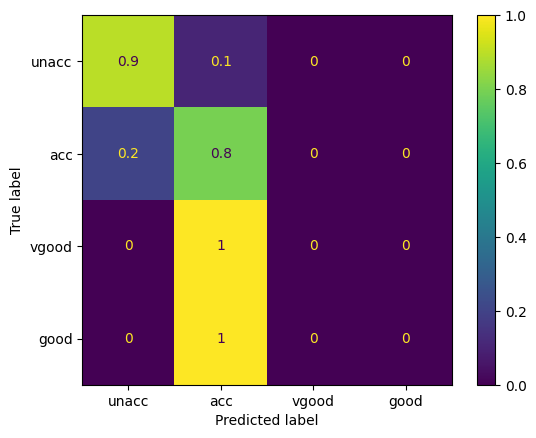

In [64]:
matrix = confusion_matrix(y_test, y_pred_gini, labels=y.unique(), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=y.unique())
disp.plot();

Проверим, что дело не в переобучении (спойлер, не в нем):

In [65]:
y_train_gini = clf_gini.predict(X_train)
print(classification_report(y_train, y_train_gini))

              precision    recall  f1-score   support

         acc       0.54      0.82      0.65       257
        good       0.00      0.00      0.00        46
       unacc       0.94      0.89      0.91       810
       vgood       0.00      0.00      0.00        44

    accuracy                           0.81      1157
   macro avg       0.37      0.43      0.39      1157
weighted avg       0.78      0.81      0.79      1157



Визуализируем (чем темнее цвет, тем более "чистый" лист, то есть более однородный):

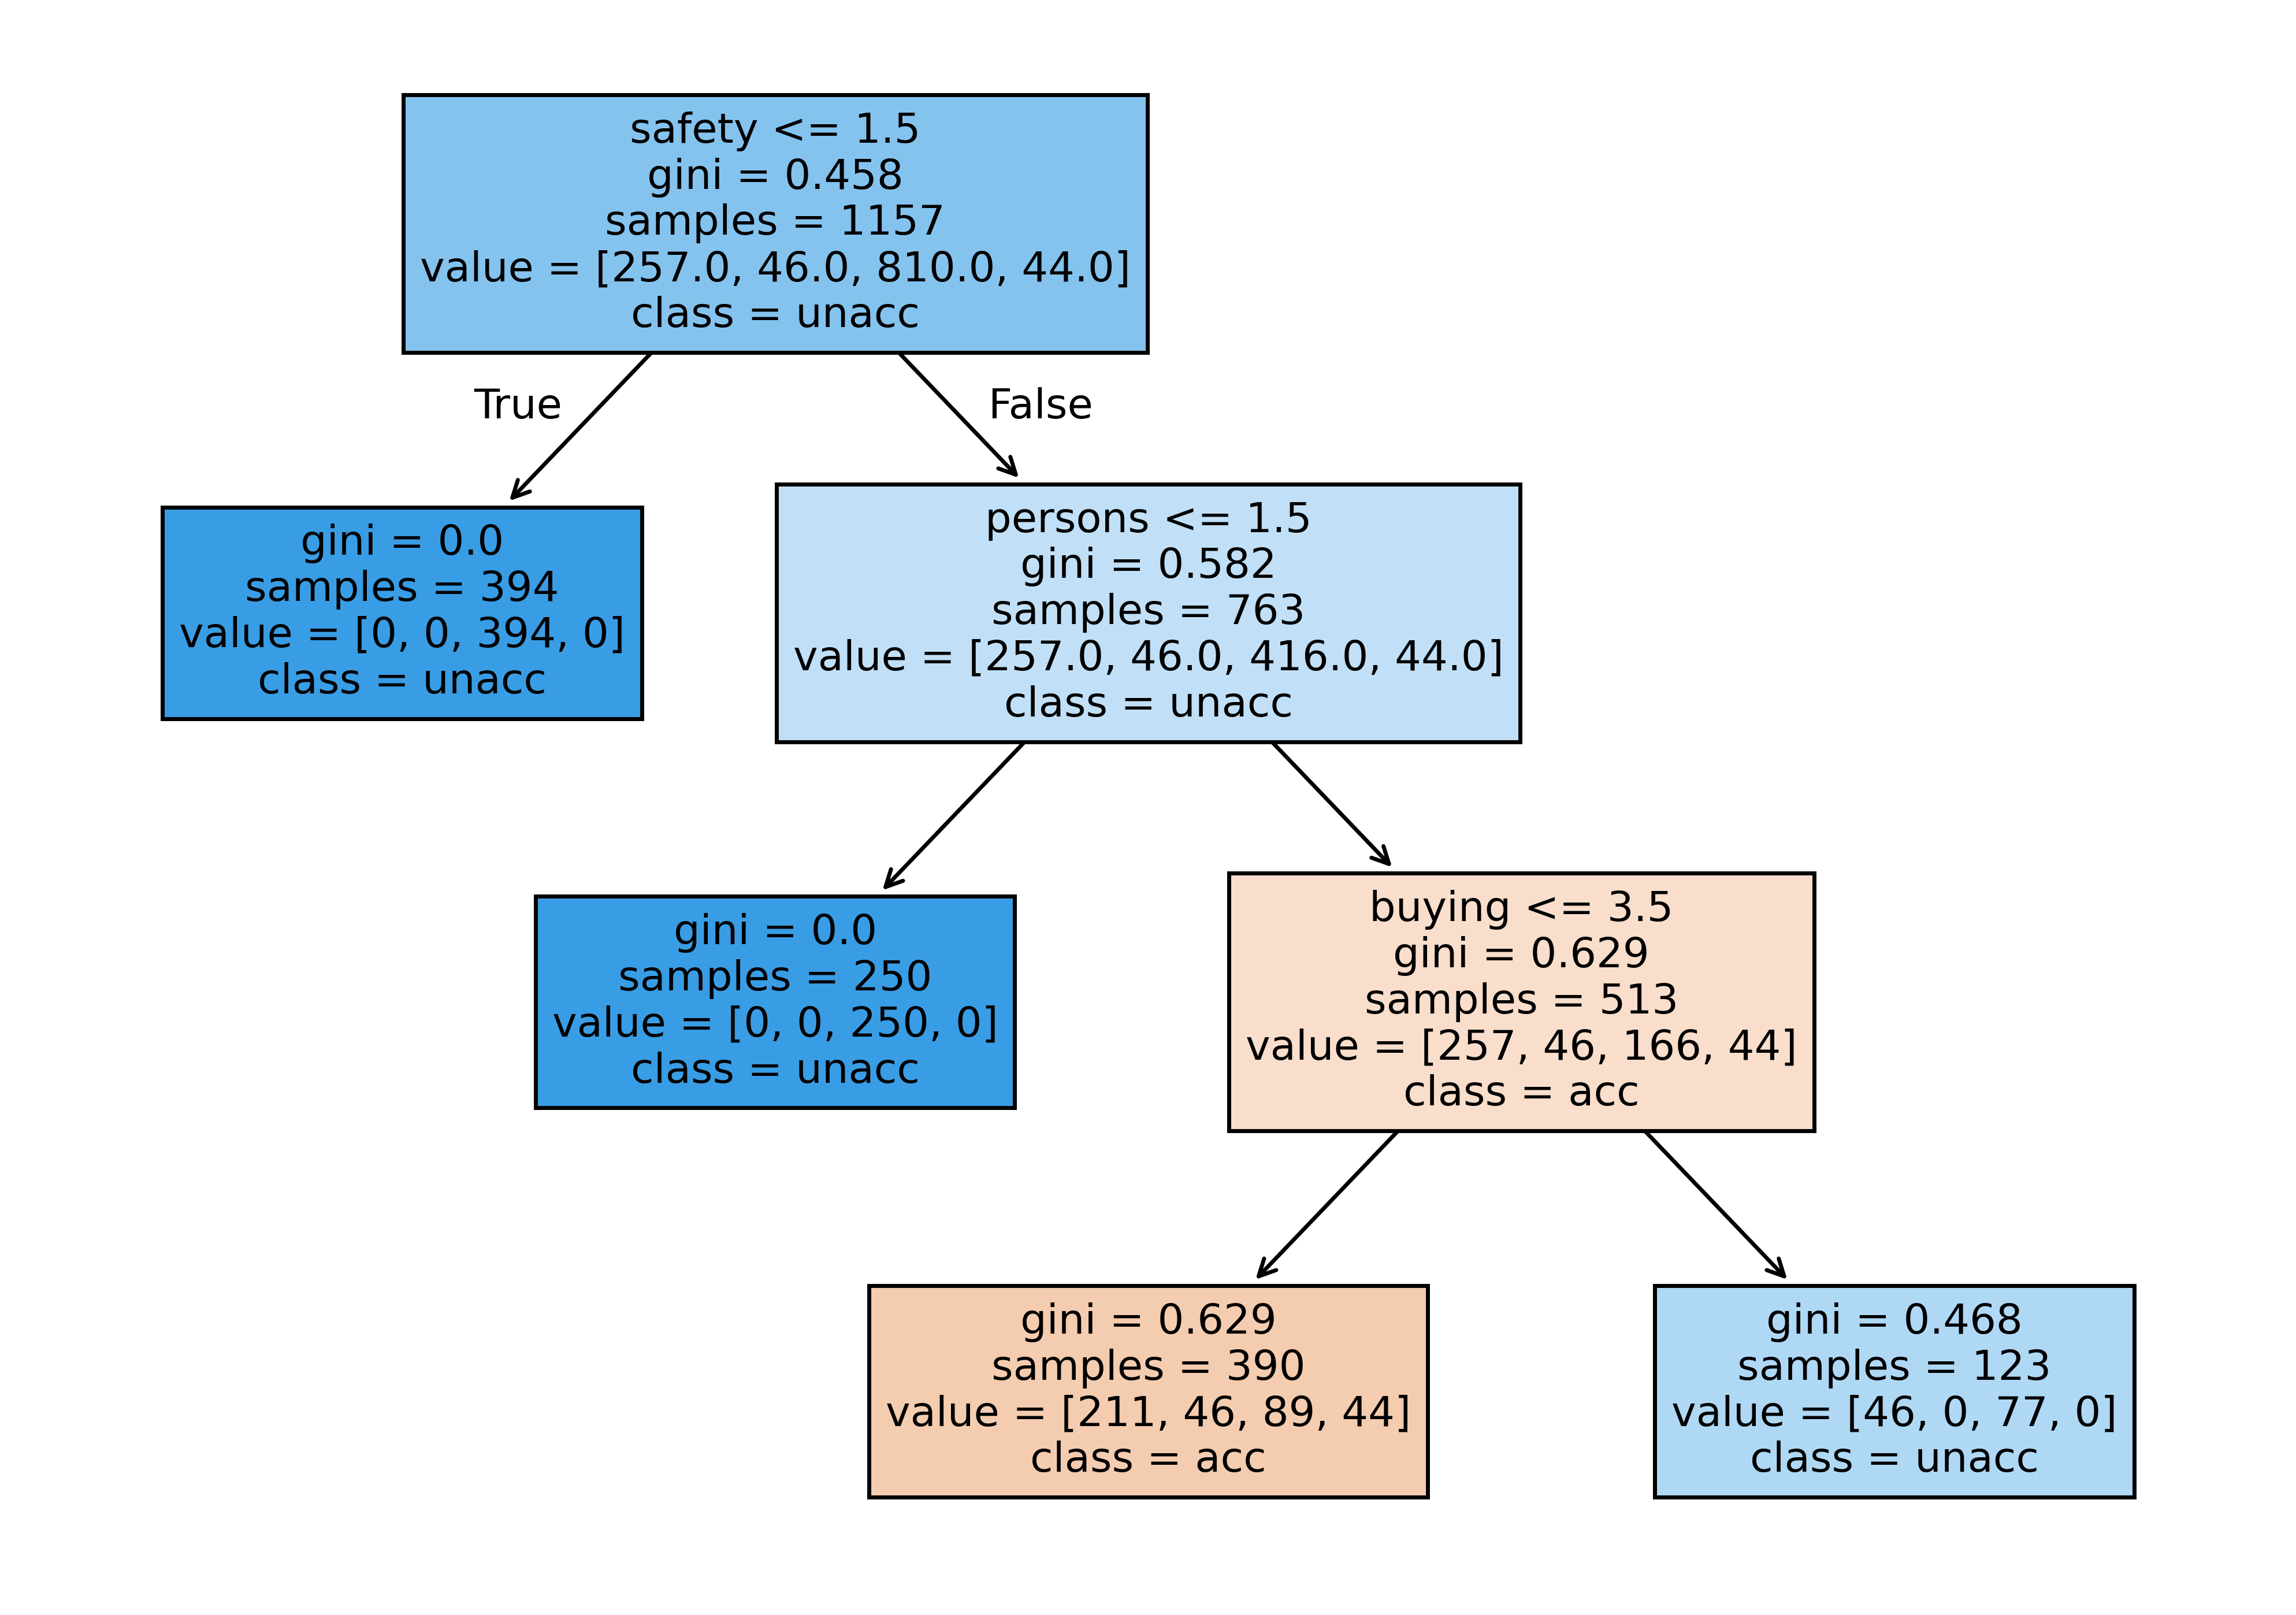

In [52]:
plt.figure(figsize=(10, 7), dpi=500)
plot_tree(
    clf_gini,
    feature_names=X_train.columns,  # признаки
    class_names=clf_gini.classes_,  # классы
    filled=True  # цветом показывается однородность листьев
    );

### Дерево при помощи энтропии

In [53]:
# инициация модели

clf_en = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=0
    )

In [54]:
# обучение и предсказание

clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

In [55]:
# качество

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.59      0.87      0.70       127
        good       0.00      0.00      0.00        23
       unacc       0.96      0.92      0.94       400
       vgood       0.00      0.00      0.00        21

    accuracy                           0.84       571
   macro avg       0.39      0.45      0.41       571
weighted avg       0.80      0.84      0.81       571



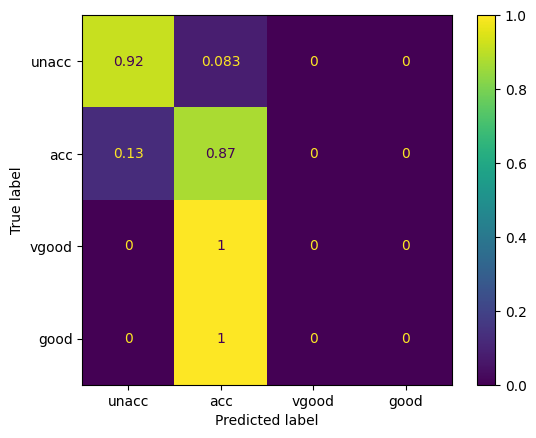

In [56]:
# качество

matrix = confusion_matrix(y_test, y_pred_en, labels=y.unique(), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=y.unique())
disp.plot();

In [57]:
# проверка на переобучение

y_train_en = clf_en.predict(X_train)
print(classification_report(y_train, y_train_en))

              precision    recall  f1-score   support

         acc       0.61      0.93      0.74       257
        good       0.00      0.00      0.00        46
       unacc       0.98      0.93      0.95       810
       vgood       0.00      0.00      0.00        44

    accuracy                           0.85      1157
   macro avg       0.40      0.46      0.42      1157
weighted avg       0.82      0.85      0.83      1157



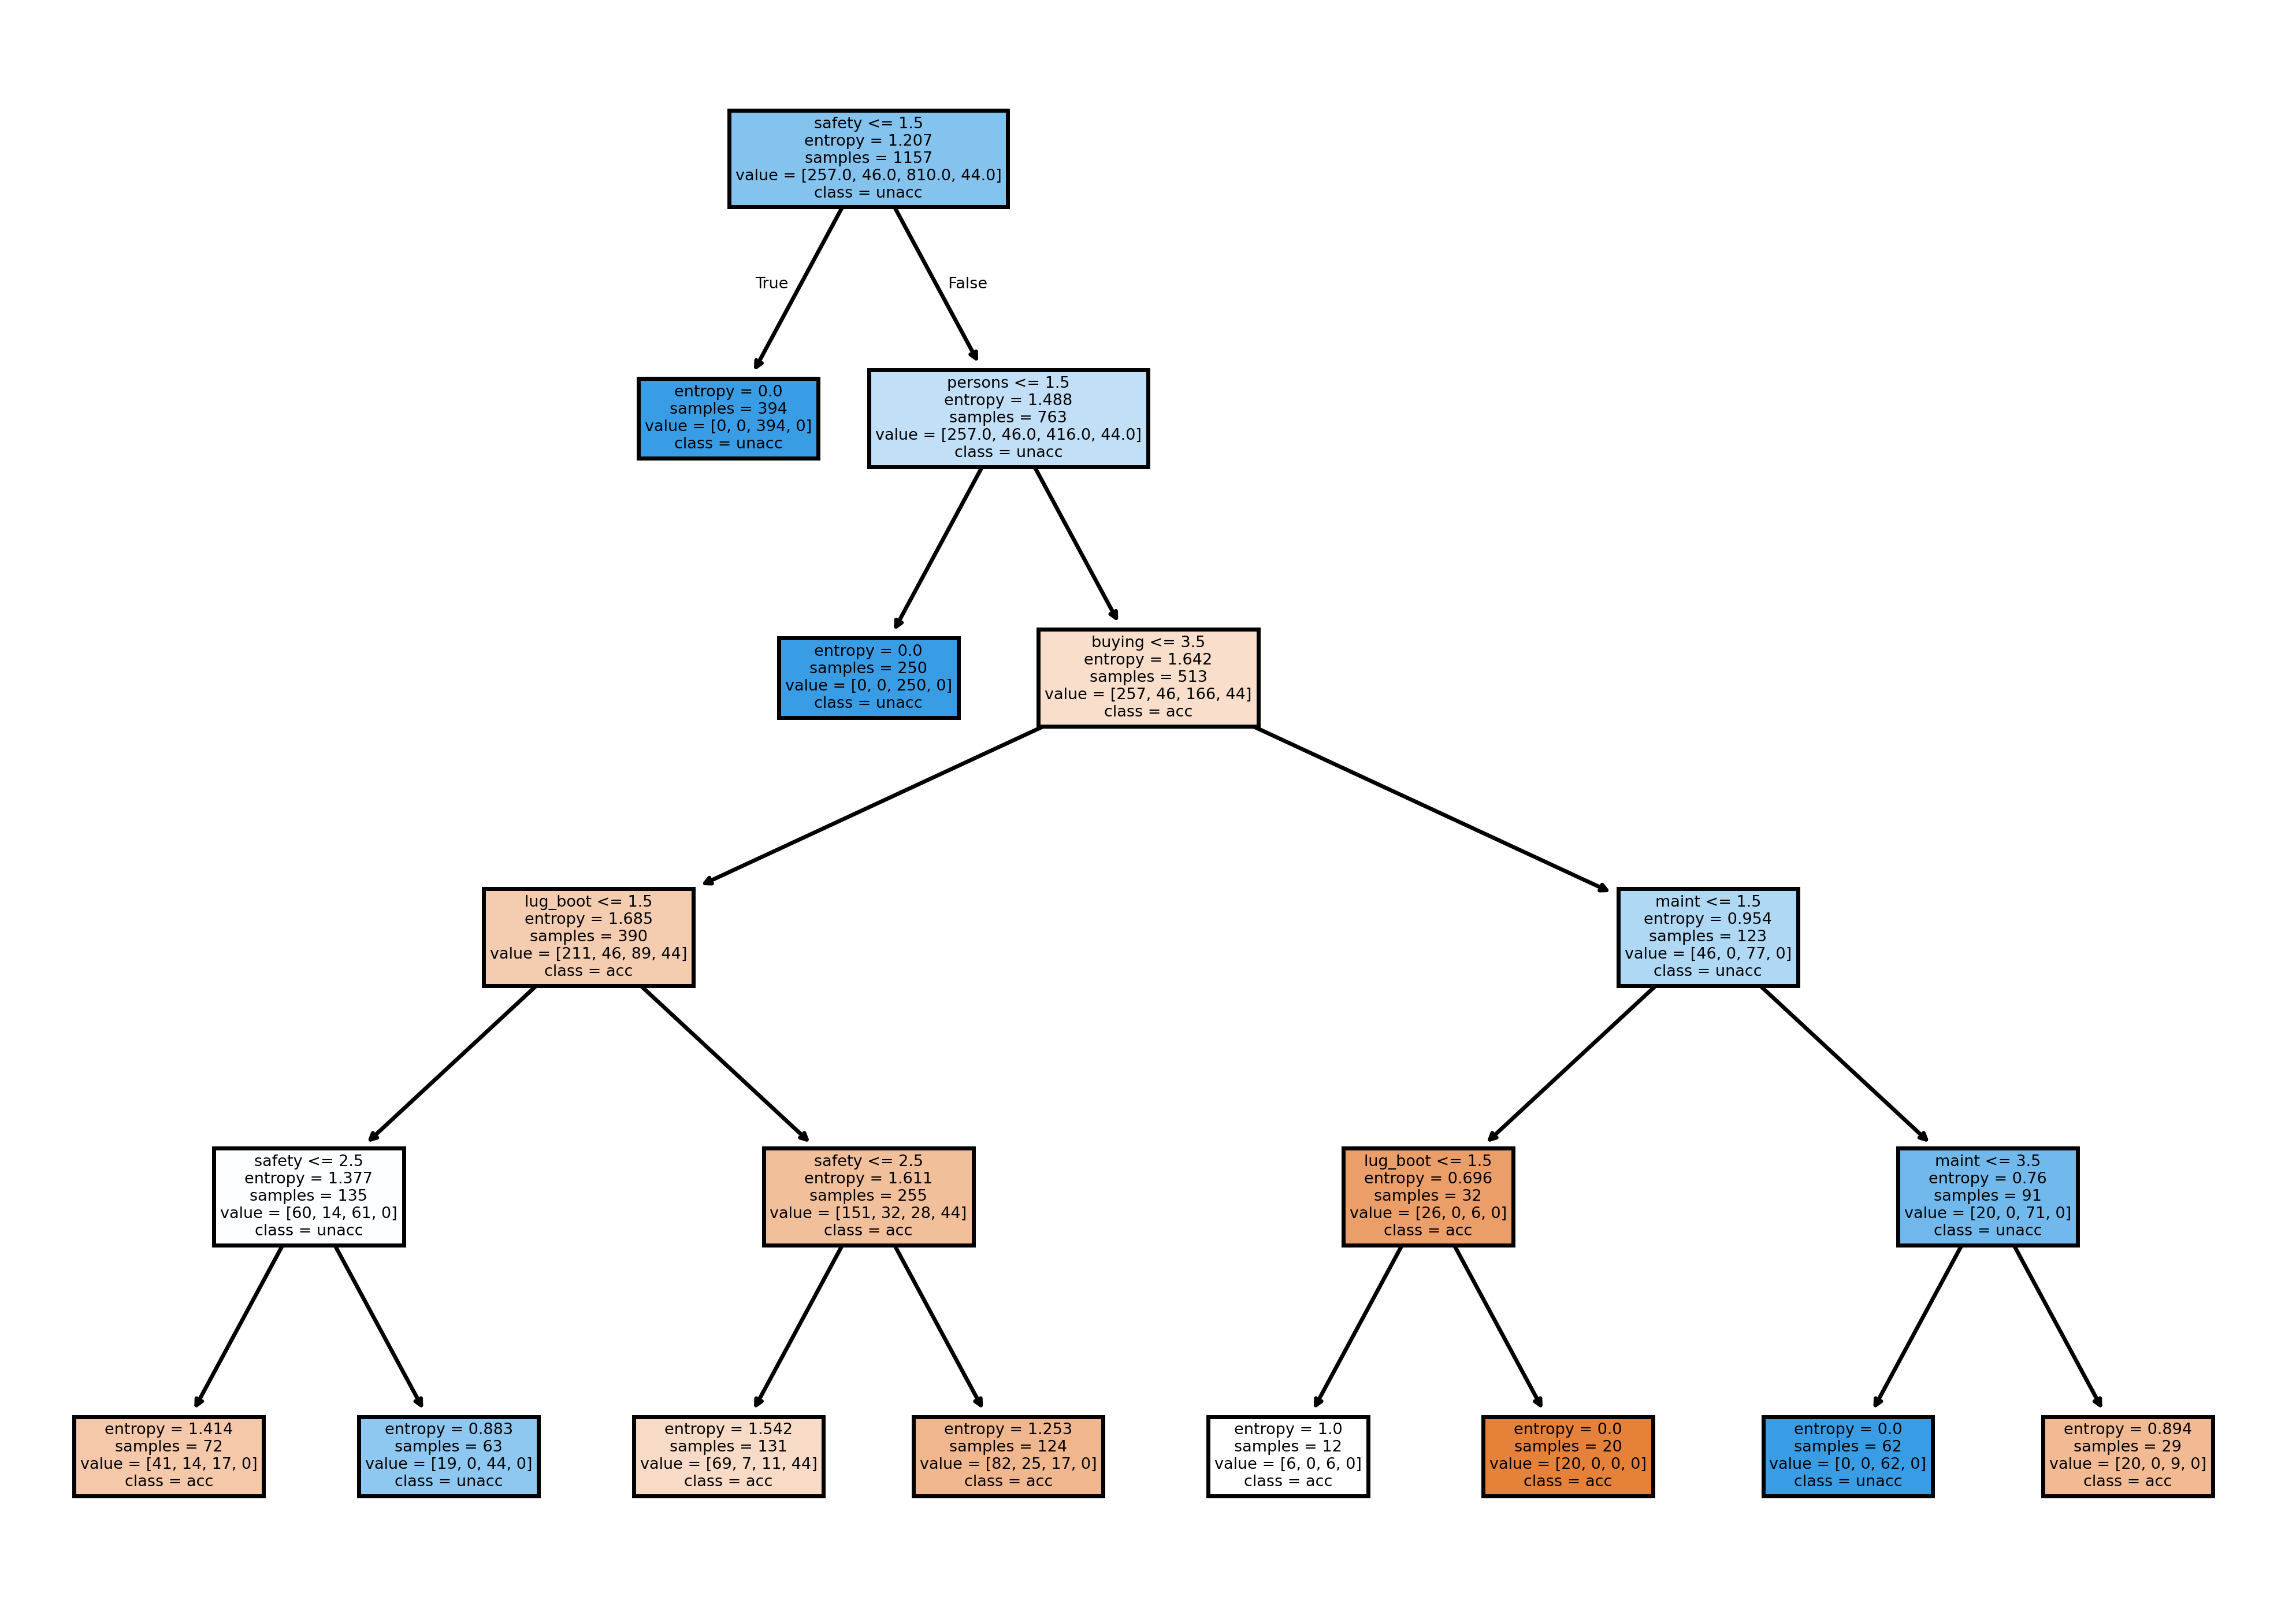

In [58]:
# визуализация

plt.figure(figsize=(10, 7), dpi=500)
plot_tree(
    clf_en,
    feature_names=X_train.columns,  # признаки
    class_names=clf_en.classes_,  # классы
    filled=True  # цветом показывается однородность листьев
    );

### Grid Search

In [59]:
parameters = {
    'criterion': ['gini', 'entropy'],  # критерий
    'max_depth':[3, 5, 7, 9],  # глубина дерева
    'min_samples_split': [2, 4, 6],  # объектов в сплите
    'min_samples_leaf': [1, 2, 3, 4]  # объектов в листе
}

d_tree = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(d_tree, parameters, cv=5, verbose=1)
clf.fit(X_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [60]:
cv_res = pd.DataFrame(clf.cv_results_)[['params', 'mean_fit_time', 'mean_test_score', 'rank_test_score']]
cv_res.sort_values('rank_test_score').head().style

,params,mean_fit_time,mean_test_score,rank_test_score
40,"{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4}",0.003794,0.942980,1
39,"{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}",0.003806,0.942980,1
37,"{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}",0.003748,0.941252,3
36,"{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}",0.003857,0.941249,4
41,"{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6}",0.004176,0.938670,5


In [61]:
the_tree = clf.best_estimator_
y_pred = the_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.85      0.92      0.88       127
        good       0.94      0.74      0.83        23
       unacc       0.98      0.96      0.97       400
       vgood       0.88      1.00      0.93        21

    accuracy                           0.94       571
   macro avg       0.91      0.90      0.90       571
weighted avg       0.94      0.94      0.94       571



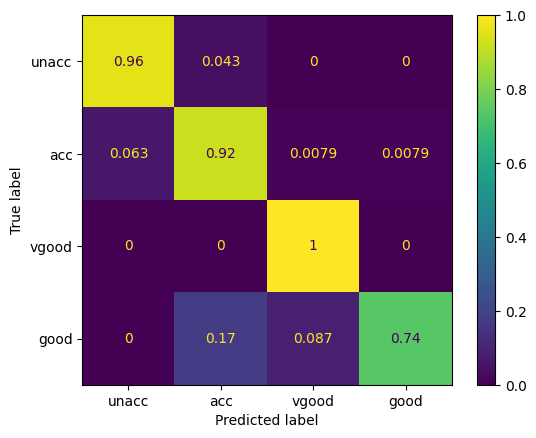

In [62]:
# качество

matrix = confusion_matrix(y_test, y_pred, labels=y.unique(), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=y.unique())
disp.plot();